<a href="https://colab.research.google.com/github/bhagirathbhard/BA775_Notebook/blob/nightly/Indian_Startup_Funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<span style="color:#023e8a;font-size:200%"><center>Indian Startup Funding</center></span>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Yicheng Jiang, Bhagirath Bhardwaj, Agnes Shih, Paul Seiters, and Siddharth Bookinkere</span></center>**

# **<a id="Content" style="color:#023e8a;">Table of Content</a>**
* [**<span style="color:#023e8a;">1. Project and Dataset Overview</span>**](#Project-Overview) 
* [**<span style="color:#023e8a;">2. EDA</span>**](#EDA)
* [**<span style="color:#023e8a;">3. Questions and Analysis</span>**](#Questions)
* [**<span style="color:#023e8a;">4. Next Steps</span>**](#NextSteps)

# **<span id="EDA" style="color:#023e8a;">Project and Dataset Overview</span>**

We are an old and very traditional money manager from the USA, investing almost exclusively in the US. After the US economy had lost a lot of its growth trajectory and the FED predicted GDP growth to linger below a mere 2% annually, our clients have been running from our investment products. Where are they all going? After booking a tee time with one of our long-time clients, we heard some adolescents with smartphones talking about the start-up scene in India. There were wild tales about startups with valuations beyond $1B, called unicorns. Apparently, there was not a hint of a slowing economy over there. Is it time to go international? After multiple people confirmed the start-up hype in India, we concluded that it is time to get ourselves a snapshot of what is going on in India. Who is investing? Where are they investing? And most importantly, which companies are they investing in? As a team, we perform data cleaning, exploratory data analysis, and finally, create a visualization in Tableau. Also, we chose the Indian Startup Funding dataset collected from multiple sources because of the varied types of funding covered, the sizable number of observations, and the time coverage from 2015 until May 2022, including the Covid-19 phase.

1.   [Indian Startup Funding & Investment Chart [2015-2021]](https://trak.in/india-startup-funding-investment-2015/)
2.   [Indian Startups - Funding & Investors Data [2018-2021]](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data)
4.   [Indian Startups - Funding Data [2022]](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data-januarymay-2022)
5.   [Funding details of the startups in India](https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding)
6.   [Cleaned Dataset from Github only for Funding calculation purpose and Dates](https://github.com/Satyampd/Startups-in-India-EDA/blob/master/dataset.csv)

**In this project 2 datasets created for different purposes; Raw data from Kaggle in India_Funding data cleaning, union, etc.. Funding_Calculation created base on Github data source, for EDA analysis (AVG,SUBSTRING based on Funding, etc..)**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `UUID`      |  Randomly generated using `GENERATE_UUID()` bigquery function      |  String, Unique, Primary Key           |
| `Investors`   | Investor Name, usually an individual or a firm            |  String, multiple-values |
| `Funding_Year` | Year the start up was funded | Date |
| `Company_Brand` | Name of the startup | String, Not null |
| `Headquarter` | Location in City, Province where the startup was founded | String |
| `Stage` | Funding Round stage of the Startup, further described below* | String |
| `What_it_does` | Brief description about start-up | String |
| `USD_Amount` | Amount in USD funded per investment round | String |
| `Total_USD_Amount` | Calculated based on USD_Amount data | Integer (Data from github) |

**What is an investment stage?**
 
*   Many companies have to complete a number of fundraising rounds before getting to the initial public offering (IPO) stage.
*   These fundraising rounds allow investors to invest money into a growing company in exchange for equity/ownership.
*   The initial investment—also known as seed funding—is followed by various rounds, known as **Series A, B, and C**.
*  A new valuation is done at the time of each funding round.
Valuations are determined by various factors, including market size, company potential, current revenues, and management.

**ERD Diagram**

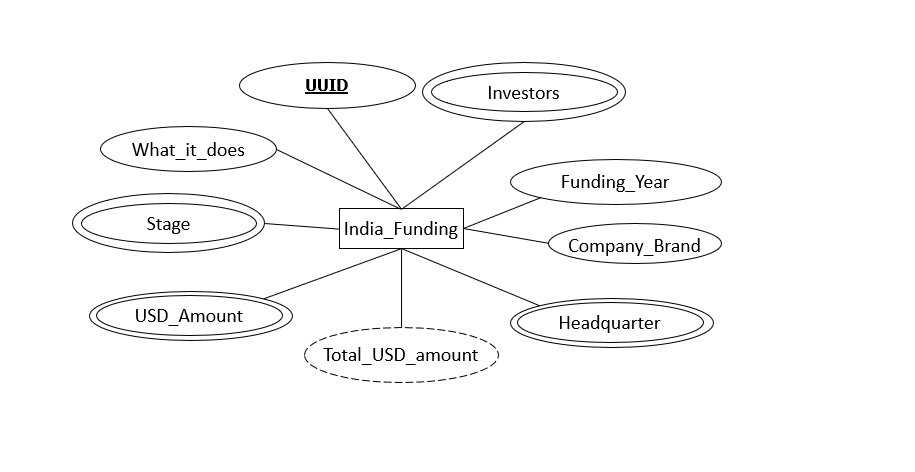

# **<span id="EDA" style="color:#023e8a;">Exploratory Data Analysis (EDA)</span>**

In [ ]:
#Connect to Google Big Query
from google.colab import auth
auth.authenticate_user()

Loading dataset by SQL and presenting criteria check for 5k rows and 8 columns.

In [ ]:
## Performing (Table Union)
%%bigquery --project=ba775-team-project-a01

WITH Indian_Startup AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT * FROM `Indian_Startup`;

,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,2019,Nu Genes,AgriTech,Telangana,Innovation in Food and Agriculture (IFA),None,6000000,"It is a seed company engaged in production, pr..."
1,2019,Pumpkart,E-marketplace,Chandigarh,Dinesh Dua,None,Undisclosed,B2B model for appliances and electrical products
2,2019,Smart Institute,Edtech,Surat,HNI investors,None,1500000,A platform to learn online
3,2019,Kratikal,Technology,Uttar pradesh,"Gilda VC, Art Venture, Rajeev Chitrabhanu",Pre-series A,1000000,Provides cyber security solutions
4,2019,Ess Kay Fincorp,Banking,Rajasthan,"TPG, Norwest Venture Partners, Evolvence India",None,33000000,Organised Non-Banking Finance Company
...,...,...,...,...,...,...,...,...
5689,2021,Eupheus Learning,E-learning,New Delhi,Lightrock India,Series C,"10,000,000",Offer pedagogically differentiated technology ...
5690,2021,Boutique Spirit Brands,Wine & Spirits,New Delhi,"IIFL﻿, ﻿Anicut Angel Fund﻿, ﻿Kae Capital﻿, Tra...",None,"10,000,000",Boutique Spirit Brands is a leading Brand crea...
5691,2021,Paytail,Financial Services,New Delhi,Cholamandalam,Seed,"1,500,000",Paytail is revolutionizing the offline commerc...
5692,2021,GoKwik,Information Technology & Services,New Delhi,"Matrix Partners India, Jitendra Gupta, RTP Global",Pre-series A,"5,000,000",GoKwik is a platform for solving shopping expe...


`5694` rows and `8` columns

Generating a `UUID` as the Primary Key (Identifier) for India Funding Table

In [ ]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
AS

SELECT GENERATE_UUID() AS UUID, * 
FROM(
SELECT 
Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
);

""


Show output with the `UUID`

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT * FROM 
`ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
LIMIT 5;

,UUID,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,33faf7fd-8e97-4d20-a2e3-2f8b55e767ac,2015,CredR,Used two-wheeler Marketplace,Mumbai,GrowthStory,Seed Funding,N/A,None
1,c1f62033-89e4-4784-b97e-7ea53cbbb79b,2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,N/A,None
2,2398474d-3f54-4c6f-83c8-fee63be69400,2015,Eazy Coach,Education Marketplace,Kolkata,Ravi Agarwal,Seed Funding,N/A,None
3,d2d94051-fc83-4864-8f07-12cbb78a9138,2015,Springboard,Data Science & UX design Learning platform,Bangalore,"Allen Blue, John Katzman, Naveen Tewari, Karti...",Seed Funding,1700000,None
4,ed987376-0d96-40cb-8f18-c29b1e2f6811,2015,Vidgyor,Video Advertisement Platform,Bangalore,AngelPrime,Seed Funding,500000,None


After viewed though raw dataset in EXCEL, we found that there are issues in HeadQuarter and Investor columns; to further check that all HeadQueater in India states, cities, or districts; in total 116 rows need to be dropped

In [ ]:
%%bigquery --project=ba775-team-project-a01
CREATE OR REPLACE TABLE `ba775-team-project-a01.Indianstartups.DataCleaning01`
AS
SELECT UUID, HeadQuarter
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
WHERE HeadQuarter not like '%Mumbai%' AND HeadQuarter not like '%Delhi%' AND HeadQuarter NOT LIKE '%Ahmedabad%' AND HeadQuarter NOT LIKE '%Chennai%' AND HeadQuarter NOT LIKE '%Kolkata%' AND HeadQuarter NOT LIKE '%Surat%' AND HeadQuarter NOT LIKE '%Pune%' AND HeadQuarter NOT LIKE '%Jaipur%' AND HeadQuarter NOT LIKE '%Lucknow%' AND HeadQuarter NOT LIKE '%Kanpur%' AND HeadQuarter NOT LIKE '%Nagpur%' AND HeadQuarter NOT LIKE '%Indore%' AND HeadQuarter NOT LIKE '%Thane%' AND HeadQuarter NOT LIKE '%Bhopal%' AND HeadQuarter NOT LIKE '%Visakhapatnam%' AND HeadQuarter NOT LIKE '%Pimpri  AND Chinchwad%' AND HeadQuarter NOT LIKE '%Patna%' AND HeadQuarter NOT LIKE '%Vadodara%' AND HeadQuarter NOT LIKE '%Ghaziabad%' AND HeadQuarter NOT LIKE '%Ludhiana%' AND HeadQuarter NOT LIKE '%Agra%' AND HeadQuarter NOT LIKE '%Nashik%' AND HeadQuarter NOT LIKE '%Faridabad%' AND HeadQuarter NOT LIKE '%Meerut%' AND HeadQuarter NOT LIKE '%Rajkot%' AND HeadQuarter NOT LIKE '%Kalyan  AND Dombivali%' AND HeadQuarter NOT LIKE '%Vasai Virar%' AND HeadQuarter NOT LIKE '%Varanasi%' AND HeadQuarter NOT LIKE '%Srinagar%' AND HeadQuarter NOT LIKE '%Aurangabad%' AND HeadQuarter NOT LIKE '%Dhanbad%' AND HeadQuarter NOT LIKE '%Amritsar%' AND HeadQuarter NOT LIKE '%Navi Mumbai%' AND HeadQuarter NOT LIKE '%Allahabad%' AND HeadQuarter NOT LIKE '%Haora%' AND HeadQuarter NOT LIKE '%Ranchi%' AND HeadQuarter NOT LIKE '%Gwalior%' AND HeadQuarter NOT LIKE '%Jabalpur%' AND HeadQuarter NOT LIKE '%Coimbatore%' AND HeadQuarter NOT LIKE '%Vijayawada%' AND HeadQuarter NOT LIKE '%Jodhpur%' AND HeadQuarter NOT LIKE '%Madurai%' AND HeadQuarter NOT LIKE '%Raipur%' AND HeadQuarter NOT LIKE '%Kota%' AND HeadQuarter NOT LIKE '%Ch ANDigarh%' AND HeadQuarter NOT LIKE '%Guwahati%' AND HeadQuarter NOT LIKE '%Solapur%' AND HeadQuarter NOT LIKE '%Hubli  AND Dharwad%' AND HeadQuarter NOT LIKE '%Bareilly%' AND HeadQuarter NOT LIKE '%Mysore%' AND HeadQuarter NOT LIKE '%Moradabad%' AND HeadQuarter NOT LIKE '%Gurgaon%' AND HeadQuarter NOT LIKE '%Aligarh%' AND HeadQuarter NOT LIKE '%Jal ANDhar%' AND HeadQuarter NOT LIKE '%Tiruchirappalli%' AND HeadQuarter NOT LIKE '%Bhubaneswar%' AND HeadQuarter NOT LIKE '%Salem%' AND HeadQuarter NOT LIKE '%Mira  AND Bhay ANDer%' AND HeadQuarter NOT LIKE '%Thiruvananthapuram%' AND HeadQuarter NOT LIKE '%Bhiw ANDi%' AND HeadQuarter NOT LIKE '%Saharanpur%' AND HeadQuarter NOT LIKE '%Gorakhpur%' AND HeadQuarter NOT LIKE '%Guntur%' AND HeadQuarter NOT LIKE '%Amravati%' AND HeadQuarter NOT LIKE '%Bikaner%' AND HeadQuarter NOT LIKE '%Noida%' AND HeadQuarter NOT LIKE '%Jamshedpur%' AND HeadQuarter NOT LIKE '%Bhilai Nagar%' AND HeadQuarter NOT LIKE '%Warangal%' AND HeadQuarter NOT LIKE '%Cuttack%' AND HeadQuarter NOT LIKE '%Firozabad%' AND HeadQuarter NOT LIKE '%Kochi%' AND HeadQuarter NOT LIKE '%Bhavnagar%' AND HeadQuarter NOT LIKE '%Dehradun%' AND HeadQuarter NOT LIKE '%Durgapur%' AND HeadQuarter NOT LIKE '%Asansol%' AND HeadQuarter NOT LIKE '%N ANDed Waghala%' AND HeadQuarter NOT LIKE '%Kolapur%' AND HeadQuarter NOT LIKE '%Ajmer%' AND HeadQuarter NOT LIKE '%Gulbarga%' AND HeadQuarter NOT LIKE '%Loni%' AND HeadQuarter NOT LIKE '%Ujjain%' AND HeadQuarter NOT LIKE '%Siliguri%' AND HeadQuarter NOT LIKE '%Ulhasnagar%' AND HeadQuarter NOT LIKE '%Jhansi%' AND HeadQuarter NOT LIKE '%Sangli Miraj Kupwad%' AND HeadQuarter NOT LIKE '%Jammu%' AND HeadQuarter NOT LIKE '%Nellore%' AND HeadQuarter NOT LIKE '%Mangalore%' AND HeadQuarter NOT LIKE '%Belgaum%' AND HeadQuarter NOT LIKE '%Jamnagar%' AND HeadQuarter NOT LIKE '%Tirunelveli%' AND HeadQuarter NOT LIKE '%Malegaon%' AND HeadQuarter NOT LIKE '%Gaya%' AND HeadQuarter NOT LIKE '%Ambattur%' AND HeadQuarter NOT LIKE '%Jalgaon%' AND HeadQuarter NOT LIKE '%Udaipur%' AND HeadQuarter NOT LIKE '%Maheshtala%' AND HeadQuarter NOT LIKE '%Tiruppur%' AND HeadQuarter NOT LIKE '%Davanagere%' AND HeadQuarter NOT LIKE '%Kozhikode%' AND HeadQuarter NOT LIKE '%Kurnool%' AND HeadQuarter NOT LIKE '%Akola%' AND HeadQuarter NOT LIKE '%Rajpur Sonarpur%' AND HeadQuarter NOT LIKE '%Bokaro Steel%' AND HeadQuarter NOT LIKE '%Bellary%' AND HeadQuarter NOT LIKE '%Patiala%' AND HeadQuarter NOT LIKE '%South Dum Dum%' AND HeadQuarter NOT LIKE '%Rajarhat Gopalpur%' AND HeadQuarter NOT LIKE '%Bhagalpur%' AND HeadQuarter NOT LIKE '%Agartala%' AND HeadQuarter NOT LIKE '%Muzaffarnagar%' AND HeadQuarter NOT LIKE '%Bhatpara%' AND HeadQuarter NOT LIKE '%Latur%' AND HeadQuarter NOT LIKE '%Panihati%' AND HeadQuarter NOT LIKE '%Dhule%' AND HeadQuarter NOT LIKE '%Rohtak%' AND HeadQuarter NOT LIKE '%Korba%' AND HeadQuarter NOT LIKE '%Bhilwara%' AND HeadQuarter NOT LIKE '%Brahmapur Town%' AND HeadQuarter NOT LIKE '%Muzaffarpur%' AND HeadQuarter NOT LIKE '%Ahmadnagar%' AND HeadQuarter NOT LIKE '%Mathura%' AND HeadQuarter NOT LIKE '%Kollam%' AND HeadQuarter NOT LIKE '%Avadi%' AND HeadQuarter NOT LIKE '%Kadapa%' AND HeadQuarter NOT LIKE '%Rajahmundry%' AND HeadQuarter NOT LIKE '%Bilaspur%' AND HeadQuarter NOT LIKE '%Kamarhati%' AND HeadQuarter NOT LIKE '%Shahjahanpur%' AND HeadQuarter NOT LIKE '%Bijapur%' AND HeadQuarter NOT LIKE '%Rampur%' AND HeadQuarter NOT LIKE '%Shimoga%' AND HeadQuarter NOT LIKE '%Ch ANDrapur%' AND HeadQuarter NOT LIKE '%Junagadh%' AND HeadQuarter NOT LIKE '%Thrissur%' AND HeadQuarter NOT LIKE '%Alwar%' AND HeadQuarter NOT LIKE '%Barddhaman%' AND HeadQuarter NOT LIKE '%Kulti%' AND HeadQuarter NOT LIKE '%Kakinada%' AND HeadQuarter NOT LIKE '%Nizamabad%' AND HeadQuarter NOT LIKE '%Parbhani%' AND HeadQuarter NOT LIKE '%Tumkur%' AND HeadQuarter NOT LIKE '%Hisar%' AND HeadQuarter NOT LIKE '%Ozhukarai%' AND HeadQuarter NOT LIKE '%Biharsharif%' AND HeadQuarter NOT LIKE '%Darbhanga%' AND HeadQuarter NOT LIKE '%Panipat%' AND HeadQuarter NOT LIKE '%Aizawl%' AND HeadQuarter NOT LIKE '%Bally%' AND HeadQuarter NOT LIKE '%Dewas%' AND HeadQuarter NOT LIKE '%Tirupati%' AND HeadQuarter NOT LIKE '%Ichalkaranji%' AND HeadQuarter NOT LIKE '%Karnal%' AND HeadQuarter NOT LIKE '%Bathinda%' AND HeadQuarter NOT LIKE '%Jalna%' AND HeadQuarter NOT LIKE '%Kirari Suleman Nagar%' AND HeadQuarter NOT LIKE '%Purnia%' AND HeadQuarter NOT LIKE '%Satna%' AND HeadQuarter NOT LIKE '%Maunath Bhanjan%' AND HeadQuarter NOT LIKE '%Barasat%' AND HeadQuarter NOT LIKE '%Sonipat%' AND HeadQuarter NOT LIKE '%Farrukhabad  AND Fatehgarh%' AND HeadQuarter NOT LIKE '%Sagar%' AND HeadQuarter NOT LIKE '%Raurkela%' AND HeadQuarter NOT LIKE '%Durg%' AND HeadQuarter NOT LIKE '%Imphal%' AND HeadQuarter NOT LIKE '%Ratlam%' AND HeadQuarter NOT LIKE '%Hapur%' AND HeadQuarter NOT LIKE '%Arrah%' AND HeadQuarter NOT LIKE '%Karimnagar%' AND HeadQuarter NOT LIKE '%Anantapur%' AND HeadQuarter NOT LIKE '%NDMC%' AND HeadQuarter NOT LIKE '%Etawah%' AND HeadQuarter NOT LIKE '%Ambernath%' AND HeadQuarter NOT LIKE '%Bharatpur%' AND HeadQuarter NOT LIKE '%Begusarai%' AND HeadQuarter NOT LIKE '%Tiruvottiyur%' AND HeadQuarter NOT LIKE '%North Dum Dum%' AND HeadQuarter NOT LIKE '%G ANDhidham%' AND HeadQuarter NOT LIKE '%Baranagar%' AND HeadQuarter NOT LIKE '%Puducherry%' AND HeadQuarter NOT LIKE '%Thoothukkudi%' AND HeadQuarter NOT LIKE '%Sikar%' AND HeadQuarter NOT LIKE '%Rewa%' AND HeadQuarter NOT LIKE '%Mirzapur  AND Vindhyachal%' AND HeadQuarter NOT LIKE '%Raichur%' AND HeadQuarter NOT LIKE '%Pali%' AND HeadQuarter NOT LIKE '%Ramagundam%' AND HeadQuarter NOT LIKE '%Hardwar%' AND HeadQuarter NOT LIKE '%Vizianagaram%' AND HeadQuarter NOT LIKE '%Katihar%' AND HeadQuarter NOT LIKE '%Nagercoil%' AND HeadQuarter NOT LIKE '%Ganganagar%' AND HeadQuarter NOT LIKE '%Karawal Nagar%' AND HeadQuarter NOT LIKE '%Mango%' AND HeadQuarter NOT LIKE '%Thanjavur%' AND HeadQuarter NOT LIKE '%Bul ANDshahr%' AND HeadQuarter NOT LIKE '%Uluberia%' AND HeadQuarter NOT LIKE '%Murwara%' AND HeadQuarter NOT LIKE '%Sambhal%' AND HeadQuarter NOT LIKE '%Singrauli%' AND HeadQuarter NOT LIKE '%Nadiad%' AND HeadQuarter NOT LIKE '%Secunderabad%' AND HeadQuarter NOT LIKE '%Naihati%' AND HeadQuarter NOT LIKE '%Yamunanagar%' AND HeadQuarter NOT LIKE '%Bidhan Nagar%' AND HeadQuarter NOT LIKE '%Pallavaram%' AND HeadQuarter NOT LIKE '%Bidar%' AND HeadQuarter NOT LIKE '%Munger%' AND HeadQuarter NOT LIKE '%Panchkula%' AND HeadQuarter NOT LIKE '%Burhanpur%' AND HeadQuarter NOT LIKE '%Raurkela Industrial Township%' AND HeadQuarter NOT LIKE '%Kharagpur%' AND HeadQuarter NOT LIKE '%Dindigul%' AND HeadQuarter NOT LIKE '%Hospet%' AND HeadQuarter NOT LIKE '%G ANDhinagar%' AND HeadQuarter NOT LIKE '%Nangloi Jat%' AND HeadQuarter NOT LIKE '%English Bazar%' AND HeadQuarter NOT LIKE '%Ongole%' AND HeadQuarter NOT LIKE '%Eluru%' AND HeadQuarter NOT LIKE '%Deoghar%' AND HeadQuarter NOT LIKE '%Chapra%' AND HeadQuarter NOT LIKE '%Haldia%' AND HeadQuarter NOT LIKE '%Kh ANDwa%' AND HeadQuarter NOT LIKE '%Puri Town%' AND HeadQuarter NOT LIKE '%N ANDyal%' AND HeadQuarter NOT LIKE '%Morena%' AND HeadQuarter NOT LIKE '%Amroha%' AND HeadQuarter NOT LIKE '%An AND%' AND HeadQuarter NOT LIKE '%Bhind%' AND HeadQuarter NOT LIKE '%Bhalswa Jahangir Pur%' AND HeadQuarter NOT LIKE '%Madhyamgram%' AND HeadQuarter NOT LIKE '%Bhiwani%' AND HeadQuarter NOT LIKE '%Navi Mumbai Panvel Raigad%' AND HeadQuarter NOT LIKE '%Baharampur%' AND HeadQuarter NOT LIKE '%Ambala%' AND HeadQuarter NOT LIKE '%Morvi%' AND HeadQuarter NOT LIKE '%Fatehpur%' AND HeadQuarter NOT LIKE '%Rae Bareli%' AND HeadQuarter NOT LIKE '%Khora%' AND HeadQuarter NOT LIKE '%Bhusawal%' AND HeadQuarter NOT LIKE '%Orai%' AND HeadQuarter NOT LIKE '%Bahraich%' AND HeadQuarter NOT LIKE '%Vellore%' AND HeadQuarter NOT LIKE '%Mahesana%' AND HeadQuarter NOT LIKE '%Khammam%' AND HeadQuarter NOT LIKE '%Sambalpur%' AND HeadQuarter NOT LIKE '%Raiganj%' AND HeadQuarter NOT LIKE '%Sirsa%' AND HeadQuarter NOT LIKE '%Dinapur Nizamat%' AND HeadQuarter NOT LIKE '%Serampore%' AND HeadQuarter NOT LIKE '%Sultan Pur Majra%' AND HeadQuarter NOT LIKE '%Guna%' AND HeadQuarter NOT LIKE '%Jaunpur%' AND HeadQuarter NOT LIKE '%Panvel%' AND HeadQuarter NOT LIKE '%Shivpuri%' AND HeadQuarter NOT LIKE '%Surendranagar Dudhrej%' AND HeadQuarter NOT LIKE '%Unnao%' AND HeadQuarter NOT LIKE '%Hugli  AND Chinsurah%' AND HeadQuarter NOT LIKE '%Sitapur%' AND HeadQuarter NOT LIKE '%Hastsal%' AND HeadQuarter NOT LIKE '%Tambaram%' AND HeadQuarter NOT LIKE '%Adityapur%' AND HeadQuarter NOT LIKE '%Badalapur%' AND HeadQuarter NOT LIKE '%Alappuzha%' AND HeadQuarter NOT LIKE '%Cuddalore%' AND HeadQuarter NOT LIKE '%Silchar%' AND HeadQuarter NOT LIKE '%Gadag  AND Betigeri%' AND HeadQuarter NOT LIKE '%Bahadurgarh%' AND HeadQuarter NOT LIKE '%Machilipatnam%' AND HeadQuarter NOT LIKE '%Shimla%' AND HeadQuarter NOT LIKE '%Medinipur%' AND HeadQuarter NOT LIKE '%Deoli%' AND HeadQuarter NOT LIKE '%Bharuch%' AND HeadQuarter NOT LIKE '%Hoshiarpur%' AND HeadQuarter NOT LIKE '%Jind%' AND HeadQuarter NOT LIKE '%Ch ANDannagar%' AND HeadQuarter NOT LIKE '%Adoni%' AND HeadQuarter NOT LIKE '%Tonk%' AND HeadQuarter NOT LIKE '%Faizabad%' AND HeadQuarter NOT LIKE '%Tenali%' AND HeadQuarter NOT LIKE '%Al ANDur%' AND HeadQuarter NOT LIKE '%Kancheepuram%' AND HeadQuarter NOT LIKE '%Vapi%' AND HeadQuarter NOT LIKE '%Rajn ANDgaon%' AND HeadQuarter NOT LIKE '%Proddatur%' AND HeadQuarter NOT LIKE '%Navsari%' AND HeadQuarter NOT LIKE '%Budaun%' AND HeadQuarter NOT LIKE '%Uttarpara Kotrung%' AND HeadQuarter NOT LIKE '%Mahbubnagar%' AND HeadQuarter NOT LIKE '%Erode%' AND HeadQuarter NOT LIKE '%Batala%' AND HeadQuarter NOT LIKE '%Saharsa%' AND HeadQuarter NOT LIKE '%Haldwani  AND Kathgodam%' AND HeadQuarter NOT LIKE '%Vidisha%' AND HeadQuarter NOT LIKE '%Thanesar%' AND HeadQuarter NOT LIKE '%Kishangarh%' AND HeadQuarter NOT LIKE '%Dallo Pura%' AND HeadQuarter NOT LIKE '%Veraval%' AND HeadQuarter NOT LIKE '%B ANDa%' AND HeadQuarter NOT LIKE '%Chittoor%' AND HeadQuarter NOT LIKE '%Krishnanagar%' AND HeadQuarter NOT LIKE '%Barrackpur%' AND HeadQuarter NOT LIKE '%Lakhimpur%' AND HeadQuarter NOT LIKE '%Santipur%' AND HeadQuarter NOT LIKE '%Porb ANDar%' AND HeadQuarter NOT LIKE '%Hindupur%' AND HeadQuarter NOT LIKE '%Balurghat%' AND HeadQuarter NOT LIKE '%Bhadravati%' AND HeadQuarter NOT LIKE '%Hanumangarh%' AND HeadQuarter NOT LIKE '%Moga%' AND HeadQuarter NOT LIKE '%Pathankot%' AND HeadQuarter NOT LIKE '%Hajipur%' AND HeadQuarter NOT LIKE '%Sasaram%' AND HeadQuarter NOT LIKE '%Habra%' AND HeadQuarter NOT LIKE '%Bid%' AND HeadQuarter NOT LIKE '%Mohali%' AND HeadQuarter NOT LIKE '%Burari%' AND HeadQuarter NOT LIKE '%Beawar%' AND HeadQuarter NOT LIKE '%Abohar%' AND HeadQuarter NOT LIKE '%Tiruvannamalai%' AND HeadQuarter NOT LIKE '%Jamuria%' AND HeadQuarter NOT LIKE '%Kaithal%' AND HeadQuarter NOT LIKE '%Godhra%' AND HeadQuarter NOT LIKE '%Bhuj%' AND HeadQuarter NOT LIKE '%Robertson Pet%' AND HeadQuarter NOT LIKE '%Shillong%' AND HeadQuarter NOT LIKE '%Rewari%' AND HeadQuarter NOT LIKE '%Hazaribag%' AND HeadQuarter NOT LIKE '%Bhimavaram%' AND HeadQuarter NOT LIKE '%M ANDsaur%' AND HeadQuarter NOT LIKE '%Chas%' AND HeadQuarter NOT LIKE '%Rudrapur%' AND HeadQuarter NOT LIKE '%Chitradurga%' AND HeadQuarter NOT LIKE '%Kumbakonam%' AND HeadQuarter NOT LIKE '%Dibrugarh%' AND HeadQuarter NOT LIKE '%Kolar%' AND HeadQuarter NOT LIKE '%Chhindwara%' AND HeadQuarter NOT LIKE '%Bankura%' AND HeadQuarter NOT LIKE '%M ANDya%' AND HeadQuarter NOT LIKE '%Dehri%' AND HeadQuarter NOT LIKE '%Raigarh%' AND HeadQuarter NOT LIKE '%Madanapalle%' AND HeadQuarter NOT LIKE '%Nalgonda%' AND HeadQuarter NOT LIKE '%Hathras%' AND HeadQuarter NOT LIKE '%Malerkotla%' AND HeadQuarter NOT LIKE '%Siwan%' AND HeadQuarter NOT LIKE '%Chhattarpur%' AND HeadQuarter NOT LIKE '%Hassan%' AND HeadQuarter NOT LIKE '%Lalitpur%' AND HeadQuarter NOT LIKE '%Gondiya%' AND HeadQuarter NOT LIKE '%North Barrackpur%' AND HeadQuarter NOT LIKE '%Bettiah%' AND HeadQuarter NOT LIKE '%Palakkad%' AND HeadQuarter NOT LIKE '%Rajapalayam%' AND HeadQuarter NOT LIKE '%Botad%' AND HeadQuarter NOT LIKE '%Modinagar%' AND HeadQuarter NOT LIKE '%Deoria%' AND HeadQuarter NOT LIKE '%Raniganj%' AND HeadQuarter NOT LIKE '%Palwal%' AND HeadQuarter NOT LIKE '%Khanna%' AND HeadQuarter NOT LIKE '%Neemuch%' AND HeadQuarter NOT LIKE '%Pilibhit%' AND HeadQuarter NOT LIKE '%Mustafabad%' AND HeadQuarter NOT LIKE '%Hardoi%' AND HeadQuarter NOT LIKE '%Guntakal%' AND HeadQuarter NOT LIKE '%Pithampur%' AND HeadQuarter NOT LIKE '%Motihari%' AND HeadQuarter NOT LIKE '%Dhaulpur%' AND HeadQuarter NOT LIKE '%Srikakulam%' AND HeadQuarter NOT LIKE '%Nabadwip%' AND HeadQuarter NOT LIKE '%Patan%' AND HeadQuarter NOT LIKE '%Jagdalpur%' AND HeadQuarter NOT LIKE '%Udupi%' AND HeadQuarter NOT LIKE '%Basirhat%' AND HeadQuarter NOT LIKE '%Damoh%' AND HeadQuarter NOT LIKE '%Halisahar%' AND HeadQuarter NOT LIKE '%Jagadhri%' AND HeadQuarter NOT LIKE '%Rishra%' AND HeadQuarter NOT LIKE '%Kurichi%' AND HeadQuarter NOT LIKE '%Dimapur%' AND HeadQuarter NOT LIKE '%Palanpur%' AND HeadQuarter NOT LIKE '%Dharmavaram%' AND HeadQuarter NOT LIKE '%Gokal Pur%' AND HeadQuarter NOT LIKE '%Kashipur%' AND HeadQuarter NOT LIKE '%Ashokenagar Kalyangarh%' AND HeadQuarter NOT LIKE '%Baidyabati%' AND HeadQuarter NOT LIKE '%Sawai Madhopur%' AND HeadQuarter NOT LIKE '%Puruliya%' AND HeadQuarter NOT LIKE '%M ANDoli%' AND HeadQuarter NOT LIKE '%Mainpuri%' AND HeadQuarter NOT LIKE '%Kanchrapara%' AND HeadQuarter NOT LIKE '%Satara%' AND HeadQuarter NOT LIKE '%Churu%' AND HeadQuarter NOT LIKE '%Madavaram%' AND HeadQuarter NOT LIKE '%Gangapur%' AND HeadQuarter NOT LIKE '%Dabgram%' AND HeadQuarter NOT LIKE '%Darjiling%' AND HeadQuarter NOT LIKE '%Barshi%' AND HeadQuarter NOT LIKE '%Etah%' AND HeadQuarter NOT LIKE '%Jhunjhunun%' AND HeadQuarter NOT LIKE '%Chikmagalur%' AND HeadQuarter NOT LIKE '%Jetpur Navagadh%' AND HeadQuarter NOT LIKE '%Roorkee%' AND HeadQuarter NOT LIKE '%Gudivada%' AND HeadQuarter NOT LIKE '%Baleshwar%' AND HeadQuarter NOT LIKE '%Baran%' AND HeadQuarter NOT LIKE '%Hoshangabad%' AND HeadQuarter NOT LIKE '%Nagaon%' AND HeadQuarter NOT LIKE '%Pudukkottai%' AND HeadQuarter NOT LIKE '%Adilabad%' AND HeadQuarter NOT LIKE '%Hosur%' AND HeadQuarter NOT LIKE '%Muktsar%' AND HeadQuarter NOT LIKE '%Yavatmal%' AND HeadQuarter NOT LIKE '%Titagarh%' AND HeadQuarter NOT LIKE '%Barnala%' AND HeadQuarter NOT LIKE '%Chittaurgarh%' AND HeadQuarter NOT LIKE '%Narasaraopet%' AND HeadQuarter NOT LIKE '%Dum Dum%' AND HeadQuarter NOT LIKE '%Basti%' AND HeadQuarter NOT LIKE '%Valsad%' AND HeadQuarter NOT LIKE '%Ambur%' AND HeadQuarter NOT LIKE '%Giridih%' AND HeadQuarter NOT LIKE '%Ch ANDausi%' AND HeadQuarter NOT LIKE '%Gonda%' AND HeadQuarter NOT LIKE '%Bally Town%' AND HeadQuarter NOT LIKE '%Kalol%' AND HeadQuarter NOT LIKE '%Bagaha%' AND HeadQuarter NOT LIKE '%Ambikapur%' AND HeadQuarter NOT LIKE '%Achalpur%' AND HeadQuarter NOT LIKE '%Gondal%' AND HeadQuarter NOT LIKE '%Bagalkot%' AND HeadQuarter NOT LIKE '%Osmanabad%' AND HeadQuarter NOT LIKE '%Akbarpur%' AND HeadQuarter NOT LIKE '%Champdani%' AND HeadQuarter NOT LIKE '%Deesa%' AND HeadQuarter NOT LIKE '%Khurja%' AND HeadQuarter NOT LIKE '%N ANDurbar%' AND HeadQuarter NOT LIKE '%Azamgarh%' AND HeadQuarter NOT LIKE '%Ghazipur%' AND HeadQuarter NOT LIKE '%Delhi Cantonment%' AND HeadQuarter NOT LIKE '%Firozpur%' AND HeadQuarter NOT LIKE '%Baripada%' AND HeadQuarter NOT LIKE '%Mughalsarai%' AND HeadQuarter NOT LIKE '%Anantnag%' AND HeadQuarter NOT LIKE '%Sehore%' AND HeadQuarter NOT LIKE '%Bongaon%' AND HeadQuarter NOT LIKE '%Kanpur Cantonment%' AND HeadQuarter NOT LIKE '%Khardaha%' AND HeadQuarter NOT LIKE '%Tadpatri%' AND HeadQuarter NOT LIKE '%Port Blair%' AND HeadQuarter NOT LIKE '%Sultanpur%' AND HeadQuarter NOT LIKE '%Bhadrak%' AND HeadQuarter NOT LIKE '%Shikohabad%' AND HeadQuarter NOT LIKE '%Jalpaiguri%' AND HeadQuarter NOT LIKE '%Shamli%' AND HeadQuarter NOT LIKE '%Karaikkudi%' AND HeadQuarter NOT LIKE '%Khargone%' AND HeadQuarter NOT LIKE '%Wardha%' AND HeadQuarter NOT LIKE '%Ranibennur%' AND HeadQuarter NOT LIKE '%Kishanganj%' AND HeadQuarter NOT LIKE '%Neyveli%' AND HeadQuarter NOT LIKE '%Amreli%' AND HeadQuarter NOT LIKE '%Suryapet%' AND HeadQuarter NOT LIKE '%Gangawati%' AND HeadQuarter NOT LIKE '%Hindaun%' AND HeadQuarter NOT LIKE '%Jamalpur%' AND HeadQuarter NOT LIKE '%Bhiwadi%' AND HeadQuarter NOT LIKE '%Ballia%' AND HeadQuarter NOT LIKE '%Bansberia%' AND HeadQuarter NOT LIKE '%Tadepalligudem%' AND HeadQuarter NOT LIKE '%Miryalaguda%' AND HeadQuarter NOT LIKE '%Baraut%' AND HeadQuarter NOT LIKE '%Udgir%' AND HeadQuarter NOT LIKE '%Betul%' AND HeadQuarter NOT LIKE '%Bundi%' AND HeadQuarter NOT LIKE '%Jehanabad%' AND HeadQuarter NOT LIKE '%Ambala Sadar%' AND HeadQuarter NOT LIKE '%Nagapattinam%' AND HeadQuarter NOT LIKE '%Nagaur%' AND HeadQuarter NOT LIKE '%Buxar%' AND HeadQuarter NOT LIKE '%Seoni%' AND HeadQuarter NOT LIKE '%Aurangabad%' AND HeadQuarter NOT LIKE '%Greater Noida%' AND HeadQuarter NOT LIKE '%Hinganghat%' AND HeadQuarter NOT LIKE '%Sujangarh%' AND HeadQuarter NOT LIKE '%Bhadreswar%' AND HeadQuarter NOT LIKE '%Chilakaluripet%' AND HeadQuarter NOT LIKE '%Kasganj%' AND HeadQuarter NOT LIKE '%Kalyani%' AND HeadQuarter NOT LIKE '%Gangtok%' AND HeadQuarter NOT LIKE '%Datia%' AND HeadQuarter NOT LIKE '%Nagda%' AND HeadQuarter NOT LIKE '%Banswara%' AND HeadQuarter NOT LIKE '%Kapurthala%' AND HeadQuarter NOT LIKE '%Bangalore%' AND HeadQuarter NOT LIKE '%Hyderabad%' AND HeadQuarter NOT LIKE '%Gurugram%' AND HeadQuarter NOT LIKE '%Benglaru%' AND HeadQuarter NOT LIKE '%Banglore%' AND HeadQuarter NOT LIKE '%Goa%' AND HeadQuarter NOT LIKE '%Guindy%' AND HeadQuarter NOT LIKE "%Bengaluru%" AND HeadQuarter NOT LIKE "%India%" AND HeadQuarter NOT LIKE "%Ahmadabad%" AND HeadQuarter NOT LIKE "%Triv ANDrum%" AND HeadQuarter NOT LIKE "%Haryana%" AND HeadQuarter NOT LIKE "%Kerala%" AND HeadQuarter NOT LIKE "%Mumba%" AND HeadQuarter NOT LIKE "%Uttar Pradesh%" AND HeadQuarter NOT LIKE "%Alleppey%" AND HeadQuarter NOT LIKE "%Gujarat%" AND HeadQuarter NOT LIKE "%Telangana%" AND HeadQuarter NOT LIKE "%Bihar%" AND HeadQuarter NOT LIKE "%Rajsam AND%" AND HeadQuarter NOT LIKE "%Rajastan%" AND HeadQuarter NOT LIKE "%Margão%" AND HeadQuarter NOT LIKE "%Hubli%" AND HeadQuarter NOT LIKE "%Kormangala%" AND HeadQuarter NOT LIKE "%Panaji%" AND HeadQuarter NOT LIKE "%Uttar pradesh%" AND HeadQuarter NOT LIKE "%Karur%" AND HeadQuarter NOT LIKE "%New delhi%" AND HeadQuarter NOT LIKE "%Samsitpur%" AND HeadQuarter NOT LIKE "%Ernakulam%" AND HeadQuarter NOT LIKE "% ANDheri%" AND HeadQuarter NOT LIKE "%Tiruchirappall%" AND HeadQuarter NOT LIKE "%Maharastra%" AND HeadQuarter NOT LIKE "%Azadpur%" AND HeadQuarter NOT LIKE "%Mylapore%" AND HeadQuarter NOT LIKE "%Kalkaji%" AND HeadQuarter NOT LIKE "%Powai%" AND HeadQuarter NOT LIKE "%Worli%" AND HeadQuarter NOT LIKE "%Kannur%" AND HeadQuarter NOT LIKE "%Kalpakkam%" AND HeadQuarter NOT LIKE "%Rajasthan%" AND HeadQuarter NOT LIKE "%Kalpakkam%" AND HeadQuarter NOT LIKE "%Hyderebad%" AND HeadQuarter NOT LIKE "%Cochin%" AND HeadQuarter NOT LIKE "%Odisha%" AND HeadQuarter NOT LIKE "%Kottayam%" AND HeadQuarter NOT LIKE "%West Bengal%"

Data Quality issue clean up through UUID

In [ ]:
%%bigquery --project=ba775-team-project-a01
DELETE FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` 
WHERE UUID IN
(SELECT UUID FROM `ba775-team-project-a01.Indianstartups.DataCleaning01`);

""


Data Validation for Funding Amount, created new dataset; after the dataset being created, we found out that values are unreasonably high. As searched the funding amount on internet, we found cleaned dataset from - https://github.com/Satyampd/Startups-in-India-EDA/blob/master/dataset.csv. (Year from 2015-2020) So we download data in CSV format and upload as the new dataset in india_startups_cleaned with dataset name of ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation and ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear. Even two datasets are same context and values, but the naming of columns are different.Funding_Calucation is used to convert Amount_USD in STRING to INT and new column AmountInUSD created. Then we store the results in to India_Funding_All_Year

In [ ]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation01`
AS

SELECT *,
(CASE WHEN USD_Amount like '%N/A%' THEN ""
     WHEN USD_Amount like '%,%' THEN REPLACE(USD_Amount,',','')
     WHEN USD_Amount like '%a%' THEN REPLACE(USD_Amount,USD_Amount,'')
     WHEN USD_Amount like '%d%' THEN REPLACE(USD_Amount,USD_Amount,'')
     WHEN USD_Amount like '%e%' THEN REPLACE(USD_Amount,USD_Amount,'')
     WHEN USD_Amount like '%o%' THEN REPLACE(USD_Amount,USD_Amount,'')
     WHEN USD_Amount = 'None' THEN REPLACE(USD_Amount,USD_Amount,'')
     ELSE USD_Amount 
END) as AmountInUSD
FROM  `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`


""


Checking Funding Year for Null Values

In [ ]:
## Check Funding year to be not null

%%bigquery --project=ba775-team-project-a01

SELECT COUNT(Funding_Year) AS null_count
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` 
WHERE Funding_Year IS NULL;

,null_count
0,0


# **<span id="Questions" style="color:#023e8a;">Questions and Analysis</span>**



**1.   How many startup created are grouped by region?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT HeadQuarter, COUNT(*) AS Startups FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
GROUP BY HeadQuarter
ORDER BY Startups DESC;

,HeadQuarter,Startups
0,Bangalore,1648
1,Mumbai,1000
2,New Delhi,655
3,Gurgaon,387
4,Gurugram,239
...,...,...
136,Maharastra,1
137,Kochin,1
138,Mumba,1
139,Tiruchirappall,1


**Bangalore** seems to be doing something great!


**2.   What year had the most amount of start ups funded? What is the overall trend of Start up funding in India?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT Funding_Year,COUNT(*) AS startups_funded 
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
GROUP BY Funding_Year
ORDER BY Funding_Year ASC;

,Funding_Year,startups_funded
0,2015,679
1,2016,1018
2,2017,690
3,2018,526
4,2019,89
5,2020,1055
6,2021,1209
7,2022,428


`2020` and `2021` were crazy! it might be interesting also to check what happened so wrong that only `89` startups were funded in `2019`!

**3.   How many Investments were Technology or Tech related? Is there a surge of the tertiary work sector in India? Is the economy shifting from primary and secondary work types to a highly skilled economy?**


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT Funding_Year, COUNT(*) AS tech_sector
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
WHERE Sector LIKE "%Tech%" OR Sector LIKE "%Software%" OR Sector LIKE "%analytic%" OR Sector LIKE '%Computer%' 
GROUP BY Funding_Year
ORDER BY Funding_Year ASC;

,Funding_Year,tech_sector
0,2015,36
1,2016,194
2,2017,205
3,2018,97
4,2019,10
5,2020,207
6,2021,383
7,2022,83


India seems to have a very heavy bias towards getting startups with technolology getting funded.

**4.   How many Investments were Technology or Tech related? Is there a surge of the tertiary work sector in India? Is the economy shifting from primary and secondary work types to a highly skilled economy?**

**Analysis on Funding**

**5.   Which are the Top 10 Funded Startups in India?**


In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, SUM(AmountInUSD) AS Total_Funding FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY StartupName
ORDER BY Total_Funding DESC
LIMIT 10;

,StartupName,Total_Funding
0,Flipkart,4759700000
1,Paytm,3348950000
2,Ola,2054200000
3,Pratilipi,1515250000
4,OYO Rooms,972000000
5,Udaan,870000000
6,Snapdeal,700000000
7,BigBasket,507000000
8,Zomato,435000000
9,Byju's,310000000


**Flipkart** seems to be raking in some big bucks these past few years!

**6.   Over the years, what is the average aggregated total amount funding across different sectors, and list out the top 10 sectors?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC
LIMIT 10;

,IndustryVertical,Sum_of_Fundings
0,eCommerce,7967145717
1,Consumer Internet,6246191934
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1322388000
5,FinTech,1199411265
6,Online Marketplace,700143000
7,E-Commerce & M-Commerce platform,680000000
8,B2B,587000000
9,Ecommerce Marketplace,500000000


It comes as no surprise that **eCommerce** (with the role played by Flipkart comes first. In addition, Consumer Internet, Technology seem to be quite near.

**7.   Which investors or investor groups invest mosts number of startups across all years?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT InvestorsName,CAST(SUM(Amount_USD) as INT64) as Sum_of_Fundings,COUNT(*) as Num_of_StartUps_Funded
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName NOT IN ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Num_of_StartUps_Funded DESC
Limit 10;

,InvestorsName,Sum_of_Fundings,Num_of_StartUps_Funded
0,Sequoia Capital,174850000,12
1,Kalaari Capital,22100000,12
2,Indian Angel Network,6310000,11
3,Info Edge (India) Ltd,10680000,9
4,Accel Partners,114200000,9
5,SAIF Partners,15500000,8
6,Trifecta Capital,18835089,8
7,Brand Capital,53375000,8
8,Venture Catalysts,2900000,7
9,Nexus Venture Partners,28530200,7


**Sequoia Capital** seems to be way ahead of the game with siginificant amount of capital invested into India! Lets see where they invested into!

**8.   List out companies that those top 10 most popular investor invested in.**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT InvestorsName,CAST(SUM(Amount_USD) as INT64) as Sum_of_Fundings,COUNT(*) as Num_of_Company_Invested, STRING_AGG(DISTINCT StartupName,"," Order By StartupName ASC) as Investment_Lists
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName not in ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Num_of_Company_Invested DESC
Limit 10;

,InvestorsName,Sum_of_Fundings,Num_of_Company_Invested,Investment_Lists
0,Sequoia Capital,174850000,12,"Akosha,Chillr,Finova Capital,Goodservice,Homel..."
1,Kalaari Capital,22100000,12,"Advenio,Cashkaro.com,CreditVidya,Cyclops,Guare..."
2,Indian Angel Network,6310000,11,"6Degree,Adytude,Flatpebble,Fourseven,Oneway.ca..."
3,Info Edge (India) Ltd,10680000,9,"BigStylist,Canvera,Diro Labs,HappilyUnmarried,..."
4,Accel Partners,114200000,9,"Agrostar,BrowserStack,Collectabillia,ManageMyS..."
5,SAIF Partners,15500000,8,"Bumper,Cashflo,Gozoomo,Playment,Pulse,SpoonJoy..."
6,Trifecta Capital,18835089,8,"BigBasket,Box8,Cashify,IndustryBuying,Magicpin..."
7,Brand Capital,53375000,8,"AirMed Labs,DoneThing,ExtraCarbon,Faircent.com..."
8,Venture Catalysts,2900000,7,"Beardo,CleanseCar,FYRE,Fynd,GoMechanic,Kalpnik..."
9,Nexus Venture Partners,28530200,7,"Arkin Net,Bolo App,GoPigeon,Goodbox,Livehealth..."


**Sequoia Capital** invested into 

1.   Akosha
2.   Chillr
3.   Finova Capital,
4.   Goodservice,
5.   Homelane,
6.   Kredx,
7.   La Renon,
8.   MedGenome,
9.   NearBuy (previously groupon India),
10.  SirionLabs,
11.  Voonik,
12.  Zoomcar


**Bangaluru** is often called the Silicon Valley of India. Let's review this numerically

**9.  Which start up received the highest funding in Bengaluru?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, SUM(Amount_USD) AS Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` 
WHERE CityLocation = 'Bengaluru'
GROUP BY StartupName
ORDER BY Amount_USD DESC;

,StartupName,Amount_USD
0,Flipkart,4759700000
1,Ola,2017200000
2,Paytm,1660000000
3,Pratilipi,1515250000
4,Udaan,870000000
...,...,...
447,Johari Shop,94000
448,Project Mudra,50000
449,Woodpie,30000
450,Strike,22500


**Flipkart** yet again raking it in! It seems pretty clear as well that a lot of big established start ups are based out of Bengaluru. Similar to Silicon Valley.

Seems like many startups are funded with multiple investors. What is the total count of that?

**10.  How many companies have multiple investors?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,InvestorsName, SUM(AmountInUSD) AS AmountInUSD FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
WHERE InvestorsName LIKE '%,%' OR InvestorsName LIKE '%and%'
GROUP BY StartupName, InvestorsName
ORDER BY AmountInUSD DESC;

,StartupName,InvestorsName,AmountInUSD
0,Flipkart,"Microsoft, eBay, Tencent Holdings",1400000000
1,Flipkart,Steadview Capital and existing investors,700000000
2,Paytm,"Alibaba Group, Ant Financial",680000000
3,Udaan,"Altimeter Capital, DST Global",585000000
4,Snapdeal,"Alibaba, Foxconn, Softbank",500000000
...,...,...,...
900,Medinfi,"Vinod Martin, Hemant Kaul, Prof. Ram Kumar Kak...",50000
901,Medzin,A M Sikander,45000
902,imedilane,"Mahendra Patel, Nilender Chauhan",40000
903,Perfumery,Oranda Global & Others,30000


**Flipkart, Paytm, and Snapdeal** have been getting funded by established investors together such as Microsoft, eBay, Tencent, Alibaba.

There are over `905`+ such startups

What role has Private Equity played in the Indian Start up funding scene?

**11.  Total number of Consumer Internet companies invested in Private Equity?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

WITH startup_funding AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT * FROM startup_funding WHERE Sector = 'Consumer Internet' AND  Stage = 'Private Equity';

,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,2016,Hike Messenger,Consumer Internet,New Delhi,"Matt Mullenweg, Adam D’Angelo, Aditya Agarwal,...",Private Equity,N/A,P2P Messaging Service
1,2016,Cashkaro,Consumer Internet,Gurgaon,Ratan Tata,Private Equity,N/A,Coupon & Cashback platform
2,2016,Reddoorz,Consumer Internet,New Delhi,500 Startups,Private Equity,N/A,Budget Accomodation Aggregator
3,2016,Little,Consumer Internet,Bangalore,GIC,Private Equity,N/A,Deal Discovery App
4,2016,Turtlemint,Consumer Internet,Mumbai,Nexus Venture Partners,Private Equity,N/A,online personalized insurance platform
...,...,...,...,...,...,...,...,...
355,2017,Fingerlix,Consumer Internet,Bangalore,"Accel Partners, Zephyr Peacock",Private Equity,310000,Food Ordering Portal
356,2017,Bank Bazaar,Consumer Internet,Chennai,Experian,Private Equity,306000,Online Financial Marketplace
357,2017,Toppr,Consumer Internet,Mumbai,"SAIF Partners, Helion Ventures, FIL Capital Ma...",Private Equity,300000,Mobile based learning app
358,2017,ZipLoan,Consumer Internet,New Delhi,"Matrix Partners India, WaterBridge Ventures, W...",Private Equity,275000,SME lending platform


**12.  Did COVID-19 have an impact into the type of industries funded in India?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE DATE LIKE '%2020%'
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC;

,IndustryVertical,Sum_of_Fundings
0,E-Tech,200000000
1,Hospitality,150000000
2,eCommerce,18358860
3,Logistics,9000000
4,Transportation,8048394
5,FinTech,3000000
6,Fashion and Apparel,1800000


As expected a lot of lockdown related industries were heavily funded!

**13.  What is the total amount invested in each sector over the years?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,SUM(AmountInUSD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC;

,IndustryVertical,Sum_of_Fundings
0,eCommerce,7967145717
1,Consumer Internet,6246191934
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1322388000
...,...,...
557,Food Ordering & Delivery App,77000
558,Location based Nightlife recommendation\\xc2\\...,77000
559,Developer Portfolio Showcase platform,70000
560,Personalized Wish List creator app,50000


**ECommerce,** likely through Flipkart has maintained a solid lead!

# **<span id="NextSteps" style="color:#023e8a;">Next Steps</span>**

*   Funding in Top 10 funded Ventures might be unrealistic and there might be a data quality issue at hand. Did Alteria Capital really receive 150 Billion in funding? And if that is true, it would hardly still be a startup, right?

*   Catagorizing Funding Stages, 
Various overlapping Stages, None, "Series C,D", "Mid-Series" Likely to be consolidated into -
Angel, Seed Capital, Early Stage Venture(Series A, B, C), Late Stage Ventue, Private Equity, Distressed, Mezzanine, Private/Public High Yield, Senior LBO Debt

In [ ]:
#Funding Stages
%%bigquery --project=ba775-team-project-a01
WITH startup_funding AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT COUNT(DISTINCT Stage) AS No_of_Stages
FROM startup_funding;

,No_of_Stages
0,92


**General Structure**

1) Pre-Seed = Angel Round = Angel Funding = (no proof of concept, just idea) 2) Seed Round = Maiden Round = Pre-Series A = (has proof of concept, strategy, first formal equity round) 3) Series A,B,C (priced equity rounds) 4) Mezzanine Financing 5) PE 6) Debt/Structured Debt

**Our structure (based on our data)**

'- mezzanine makes no sense here because of too little data points '- round split makes no sense because 668 seed entries without seed info '-

1) Pre-Seed 2) Seed 3) Private Equity 4) Debt Funding

**Allocation from data below:**

1) Pre-Seed = 'Angel Round', 'Seed/Angel Funding', 'Seed/ Angel Funding', 'Seed / Angel Funding', 'Angel', 'Pre-Series A', 'Pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding'

2) Seed = 'Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B(Extension)', 'Venture - Series Unknown'

3) Private Equity = 'Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding'

4) Debt Funding = 'Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding' THEN 'Debt Funding'

**Code**

CASE WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'Pre-series A'OR 'Angel / Seed Funding'OR 'Seed / Angle Funding' THEN 'Pre-Seed' WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B(Extension)', 'Venture - Series Unknown') THEN 'Seed' WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity' WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding') THEN 'Debt Funding'

In [ ]:
%%bigquery --project=ba775-team-project-a01
Select InvestmentType,COUNT(InvestmentType) AS Companies_funded from `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY InvestmentType;

## Currently has 43 Investment Type with various companies_funded

,InvestmentType,Companies_funded
0,Seed,4
1,Series A,21
2,Series B,17
3,Series C,11
4,Series G,1
5,Series J,1
6,Angel Round,1
7,Debt Funding,22
8,Seed Funding,668
9,Private Equity,989


StartupName also stands for company name, Ola has most number of funding stages - **12**

In [ ]:
%%bigquery --project=ba775-team-project-a01
Select DISTINCT(StartupName), COUNT(InvestmentType) AS NumberOfFundingStages from `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY StartupName
ORDER BY NumberOfFundingStages DESC;     

,StartupName,NumberOfFundingStages
0,Ola,12
1,OYO Rooms,8
2,Swiggy,8
3,Paytm,6
4,Flipkart,6
...,...,...
1543,Kanhaiya,1
1544,Healthsignz,1
1545,Credright,1
1546,Origo Commodities India Pvt. Ltd,1


We categorize the Investment Type into 4 categories Private Equity, Seed, Pre-Seed, Debt Funding with CASE statement and count the number of investment type for each

In [ ]:
%%bigquery --project=ba775-team-project-a01
Select DISTINCT(NewInvestmentType), SUM(NumberofInvestments) AS NumberOfInvestmentTypes from (

SELECT InvestmentType , COUNT(InvestmentType) AS NumberofInvestments,
  CASE
  WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding', 'Maiden Round', 'pre-Series A', 'Pre-series A') THEN 'Pre-Seed'
  WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B (Extension)', 'Venture - Series Unknown') THEN 'Seed'
  WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity'
  WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding', 'Mezzanine') THEN 'Debt Funding'
  END as NewInvestmentType
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY InvestmentType)
GROUP BY NewInvestmentType
ORDER BY NumberOfInvestmentTypes DESC;  

,NewInvestmentType,NumberOfInvestmentTypes
0,Private Equity,1000
1,Seed,748
2,Pre-Seed,110
3,Debt Funding,29


We also want to check the pervious process to make sure it is correct in translating from one to another category

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT InvestmentType , COUNT(InvestmentType) AS NumberofInvestments,
  CASE
  WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding', 'Maiden Round', 'pre-Series A', 'Pre-series A') THEN 'Pre-Seed'
  WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B (Extension)', 'Venture - Series Unknown') THEN 'Seed'
  WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity'
  WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding', 'Mezzanine') THEN 'Debt Funding'
  END as NewInvestmentType
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY InvestmentType

,InvestmentType,NumberofInvestments,NewInvestmentType
0,Seed,4,Seed
1,Series A,21,Seed
2,Series B,17,Seed
3,Series C,11,Seed
4,Series G,1,Seed
5,Series J,1,Seed
6,Angel Round,1,Pre-Seed
7,Debt Funding,22,Debt Funding
8,Seed Funding,668,Seed
9,Private Equity,989,Private Equity


Beyond the above, we are looking to further visualize and identify sectors of growth opportunities in the Indian Startup scene. Potentially identifying areas where we can invest into.

# References



1. [Formatting of the Jupyter Notebook](https://www.kaggle.com/code/vanguarde/h-m-eda-first-look)
2. [Startup Investment Funding stage definition](https://www.kaggle.com/code/vanguarde/h-m-eda-first-look)



